# Solution to HW 5 question 2): 

The Hit & miss method with estimated error: 

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

In [2]:
def f(x):
    f=x**2
    return f

In [3]:
def HitandMiss():
    N=1000000
    x=np.random.random(N)
    y=np.random.random(N)
    Ni=0

    for i in range(N):
        yx=f(x[i])
        if(y[i]<yx):
            Ni+=1
        
    I=float(Ni)/float(N)
    
    return I

In [4]:
I=HitandMiss()
I

0.333595

In [5]:
M=100
Ilist=[]
for i in range(M):
    I=HitandMiss()
    Ilist.append(I)

Iarray=np.array(Ilist)

avg=np.mean(Iarray)
std=np.std(Iarray)
error=std/np.sqrt(M)

print('Hit and Miss: ')
print('I=',avg,'+/-',error)

Hit and Miss: 
I= 0.33335018000000005 +/- 4.887671097772452e-05


In [6]:
def simpleMC(a,b):    # a=0 and b=1 in this problem
    N=1000000
    x=np.random.random(N)
    y=np.zeros(N)
    mysum=0
    
    for i in range(N):
        y[i]=f(x[i])
        mysum += y[i]
    
    I=mysum/N*(b-a)
    return I 
    

In [7]:
M=100
Ilist=[]
for i in range(M):
    I=simpleMC(0,1)
    Ilist.append(I)

Iarray=np.array(Ilist)

avg=np.mean(Iarray)
std=np.std(Iarray)
error=std/np.sqrt(M)

print("Simple Monte Carlo: ")
print('I=',avg,'+/-',error)

Simple Monte Carlo: 
I= 0.3333337344707134 +/- 2.8275171841650226e-05


importance sampling according to P(x)=x, the inverse function relation is x = y^2/2 which gives y= sqrt(2x)

In [8]:
def P(r):
    p=np.sqrt(2*r)
    return p

In [9]:
def ImportanceSamplingMC(a,b):
    N=100000
    r=np.random.random(N)
    x=P(r)
    x1=np.sqrt(2)*x    #normalizing the distribution
    y=np.zeros(N)
    mysum=0
    
    for i in range(N):
        y[i]=f(x[i]/P(x1[i]))
        mysum += y[i]
        
    I =mysum/N
    return I 

In [10]:
M=100
Ilist=[]
for i in range(M):
    I=ImportanceSamplingMC(0,1)
    Ilist.append(I)

Iarray=np.array(Ilist)

avg=np.mean(Iarray)
std=np.std(Iarray)
error=std/np.sqrt(M)

print("Importance Sampling:")
print('I=',avg,'+/-',error)


Importance Sampling:
I= 0.33336037157524934 +/- 3.690048075173097e-05


# question 3): 

In [11]:
def f(x):
    f=np.sqrt(x)
    return f

In [12]:
I=HitandMiss()

print('Hit and Miss: ')
print('I=',I)

Hit and Miss: 
I= 0.66643


In [13]:
M=100
Ilist=[]
for i in range(M):
    I=HitandMiss()
    Ilist.append(I)

Iarray=np.array(Ilist)

avg=np.mean(Iarray)
std=np.std(Iarray)
error=std/np.sqrt(M)

print('Hit and Miss: ')
print('I=',avg,'+/-',error)

Hit and Miss: 
I= 0.6666928900000001 +/- 4.611810901370512e-05


In [14]:
I=simpleMC(0,1)

print('simple MC: ')
print('I=',I)

simple MC: 
I= 0.6666535506466584


In [15]:
M=100
Ilist=[]
for i in range(M):
    I=simpleMC(0,1)
    Ilist.append(I)

Iarray=np.array(Ilist)

avg=np.mean(Iarray)
std=np.std(Iarray)
error=std/np.sqrt(M)

print('simple MC: ')
print('I=',avg,'+/-',error)

simple MC: 
I= 0.6666762788326642 +/- 2.410388274422513e-05


to solve for the probability distribution needed, we need to solve a transcendental equation for y: 
    $x=N(y+1/a*exp(-a*y))$ , where $N=a/(a+exp(-a)-1)$
    in order to do that I first tried to use the solver package from python, and searched for how to solve transcendental equations in python, but this gave a lot of errors, so I tried Von Neumann rejection method of generating the needed random numbers according to the given probability distribution, and then used these numbers in Monte Carlo importance sampling integration:

In [16]:
a=1
Norm=a/(a+np.exp(-a)-1)

Acceptance Ratio:  0.5843


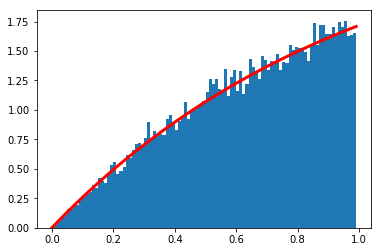

In [17]:
N = 50000

xmax = 1
ymax = Norm*(1-np.exp(-a * xmax))

rx = np.random.random(N)*xmax
ry = np.random.random(N)*ymax

values = []

Nin = 0
for i in range(N):
    if(ry[i] <= (Norm*(1-np.exp(-a * rx[i])))):
        # Accept
        values.append(rx[i])
        Nin += 1
        
x = np.asarray(values)
    
print("Acceptance Ratio: ",Nin/float(N))
binwidth=1/100
#pyplot.hist(rx,bins=np.arange(0.,100., binwidth),density=True);
pyplot.hist(x,bins=np.arange(0.,xmax, binwidth),density=True);
pyplot.plot(np.arange(0.,xmax,binwidth),Norm*(1 - np.exp(-a*np.arange(0,xmax, binwidth))),ls='-',c='red',lw=3);

In [18]:
def ImportanceSamplingMC(c,b,x,a):
    I=0
    for i in range(len(x)):
        I += np.sqrt(x[i])/(Norm*(1-np.exp(-a * x[i]))) 

    I=I/len(x)
    return I 

In [19]:
I=ImportanceSamplingMC(0,1,x,a)
print("Importance sampling: \n","I= ",I)

Importance sampling: 
 I=  0.6656060280129487


to estimate the variance and find a that minimizes the variance, I needed to modulerize the Von_Neumann random number generator:

In [20]:
def Von_Neumann_rng(a):
    N = 50000
    
    Norm=a/(a+np.exp(-a)-1)
    xmax = 1
    ymax = Norm*(1-np.exp(-a * xmax))

    rx = np.random.random(N)*xmax
    ry = np.random.random(N)*ymax

    values = []

    Nin = 0
    for i in range(N):
        if(ry[i] <= (Norm*(1-np.exp(-a * rx[i])))):
            # Accept
            values.append(rx[i])
            Nin += 1
        
    x = np.asarray(values)
    return x                 #returning the pseudorandom numbers

In [24]:
A=[]
Var=[]
a=0.5

for i in range(10):
    M=100
    Ilist=[]
    for i in range(M):
        x=Von_Neumann_rng(a)
        I=ImportanceSamplingMC(0,1,x,a)
        Ilist.append(I)

    Iarray=np.array(Ilist)

    avg=np.mean(Iarray)
    std=np.std(Iarray)
    #error=std/np.sqrt(M)
    variance=std**2
    
    A.append(a)
    Var.append(variance)
    a+=0.5

Text(0,0.5,'Variance')

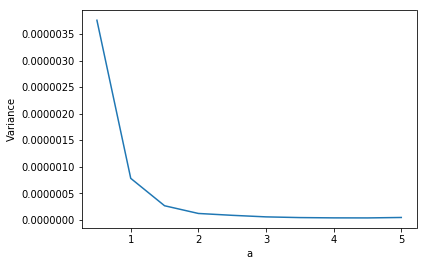

In [25]:
pyplot.plot(A,Var)
pyplot.xlabel('a')
pyplot.ylabel('Variance')

it can be seen that increasing a decreases the variance 

In [34]:
Var


[3.758919573229972e-06,
 7.794085658744205e-07,
 2.6289282449040616e-07,
 1.1751305955383985e-07,
 8.253287348072702e-08,
 5.317376131417607e-08,
 3.9877848692388295e-08,
 3.45596438772669e-08,
 3.355053345433815e-08,
 4.1802201428689893e-08]

In [30]:
min(Var)

3.355053345433815e-08

it can be seen that in the given range for a (from 0.5 to 5 in 0.5 steps) that a=4.5 gives the minimum variance